In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, zscore

In [2]:
# Load the cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo = pd.read_csv('../data/togo-dapaong_clean.csv')

# Add country labels for comparison
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Concatenate all into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

C:\Users\DON\AppData\Local\Temp\ipykernel_9372\3832751877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y='GHI', palette='Set2')


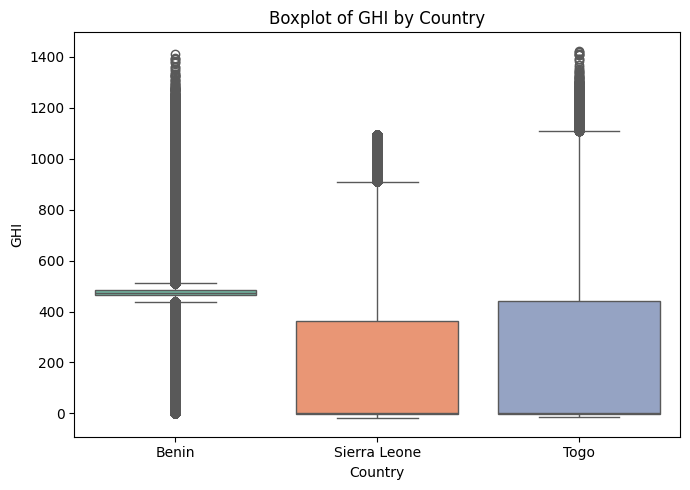

In [3]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_all, x='Country', y='GHI', palette='Set2')
plt.title('Boxplot of GHI by Country')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

C:\Users\DON\AppData\Local\Temp\ipykernel_9372\845117218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y='DNI', palette='Set2')


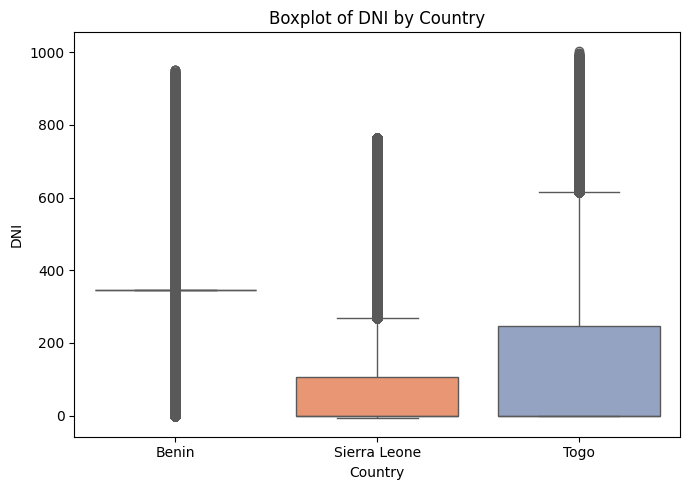

In [4]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_all, x='Country', y='DNI', palette='Set2')
plt.title('Boxplot of DNI by Country')
plt.ylabel('DNI')
plt.tight_layout()
plt.show()

C:\Users\DON\AppData\Local\Temp\ipykernel_9372\1370882686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y='DHI', palette='Set2')


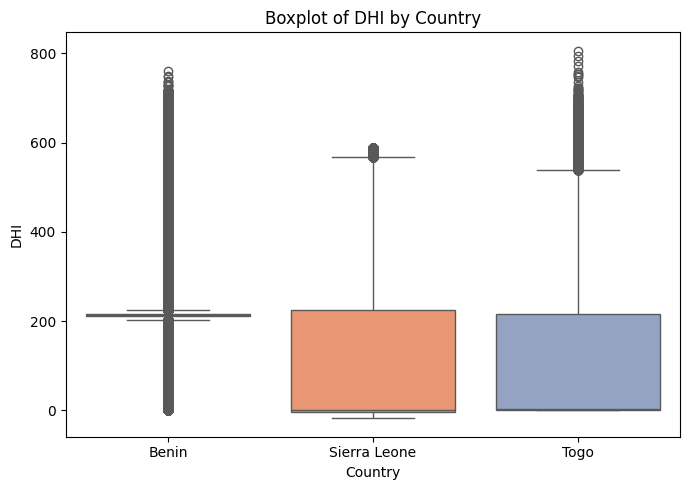

In [5]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_all, x='Country', y='DHI', palette='Set2')
plt.title('Boxplot of DHI by Country')
plt.ylabel('DHI')
plt.tight_layout()
plt.show()

In [6]:
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Format for better readability
summary_stats.columns = ['_'.join(col).capitalize() for col in summary_stats.columns]
summary_stats = summary_stats.reset_index()

# Display the summary table
summary_stats

,Country,Ghi_mean,Ghi_median,Ghi_std,Dni_mean,Dni_median,Dni_std,Dhi_mean,Dhi_median,Dhi_std
0,Benin,475.492396,474.2,228.385103,348.965279,345.7,193.441746,222.224081,213.4,107.493717
1,Sierra Leone,201.594706,0.3,297.327978,115.563735,-0.1,216.077422,113.449016,-0.1,158.064287
2,Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


In [8]:
f_stat, p_value_anova = f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)

print(f"One-way ANOVA results: F = {f_stat:.2f}, p = {p_value_anova:.4f}")

One-way ANOVA results: F = 145966.88, p = 0.0000


In [9]:
h_stat, p_value_kruskal = kruskal(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)

print(f"Kruskal–Wallis H-test results: H = {h_stat:.2f}, p = {p_value_kruskal:.4f}")

Kruskal–Wallis H-test results: H = 324623.43, p = 0.0000


##  Key Observations from Cross-Country Solar Analysis

- **Benin** shows the **highest average and median GHI**, indicating it is the most promising location for solar energy deployment among the three.
- **Sierra Leone** exhibits an extremely **low median GHI (~0)**, implying **inconsistent solar irradiance**, likely due to heavy cloud cover or frequent precipitation.
- **Togo** ranks in the middle but still falls significantly behind Benin in terms of both **mean and median solar values**.
- **Statistical testing** (ANOVA: F = 145966.88, p = 0.0000 and Kruskal–Wallis: H = 324623.43, p = 0.0000) confirms that the GHI differences between countries are **statistically significant**.
- Sierra Leone and Togo have **higher standard deviations**, indicating **more variability** in solar conditions compared to Benin.
- While **DNI (Direct Normal Irradiance)** follows the same trend as GHI, **DHI (Diffuse Horizontal Irradiance)** is noticeably high in Sierra Leone, suggesting **diffuse light dominates** when skies are overcast.
- These findings suggest **Benin is best suited for high-efficiency, direct-sunlight PV systems**, while **Sierra Leone may benefit more from systems optimized for diffuse light** (e.g., bifacial panels or hybrid setups).


C:\Users\DON\AppData\Local\Temp\ipykernel_9372\1890243337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_means, x='Country', y='Ghi_mean', palette='YlOrBr')


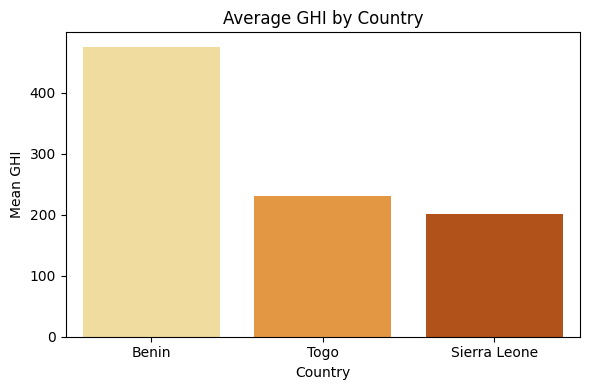

In [12]:
ghi_means = summary_stats[['Country', 'Ghi_mean']].sort_values(by='Ghi_mean', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=ghi_means, x='Country', y='Ghi_mean', palette='YlOrBr')

plt.title('Average GHI by Country')
plt.ylabel('Mean GHI')
plt.xlabel('Country')
plt.tight_layout()
plt.show()